## 繪製進階統計圖

除了最基本的統計圖表外，在資料視覺化上為了一次能在圖中呈現較多資訊、或是作多個變項的關聯性呈現，也有許多進階的統計圖陸續被提出。而seaborn套件的強大威力就在於可快速地協助我們繪製這些進階的圖形，以下我們將介紹三個非常常被使用到的圖形，分別為小提琴圖(violin plot)、多變量圖(pair plot)、以及熱點圖(heatmap)。

- ### 小提琴圖
小提琴圖可用來比較不同組別中特定連續變項的分布是否有差異，如下圖我們可以同時考慮不同艙等(Pclass)與性別(Sex)的乘客在年齡上的分布。

    - [官方網頁與範例](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

In [1]:
# 載入seaborn套件並命名為sns
import seaborn as sns

# 載入matplotlib中的pypplot模組並且命名為plt
import matplotlib.pyplot as plt

# 由於繪圖需要資料，在此同時載入numpy套件與pandas套件
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
# 此步驟需要 google 權限認證
%matplotlib inline

In [2]:
# 讀取資料，在此同樣以鐵達尼號資料為範例
# 載入範例的資料集，這次我們使用的是鐵達尼號的資料，後續在機器學習領域上會很常見到這份資料集, 將資料集指到 google drive 底下 My Drive/Python-Data-Analysis-master/dataset/titanic/train.csv, 如有更動此預設位子請在自行調整
df = pd.read_csv('/content/drive/My Drive/Python-Data-Analysis-master/dataset/titanic/train.csv')

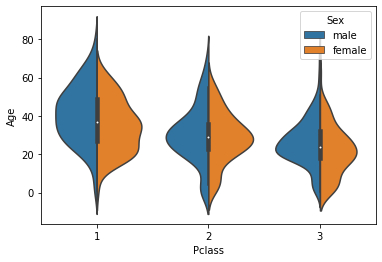

In [3]:
# 使用violinplot繪製小提琴圖
sns.violinplot(x='Pclass', y='Age', data=df, hue='Sex', split=True)

- ### 多變量圖
如果我們想要一次觀察資料中連續變項的分布和彼此之間的散佈圖，我們可以使用多變量圖(pairplot)來做觀察。如圖所示，對角線部分是各個欄位的直方圖、其餘部分則是兩兩變項的散佈圖。另外一個很類似的圖形則是jointplot，差異在於單次只能看兩個連續變項。

    - [官方網頁與範例](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

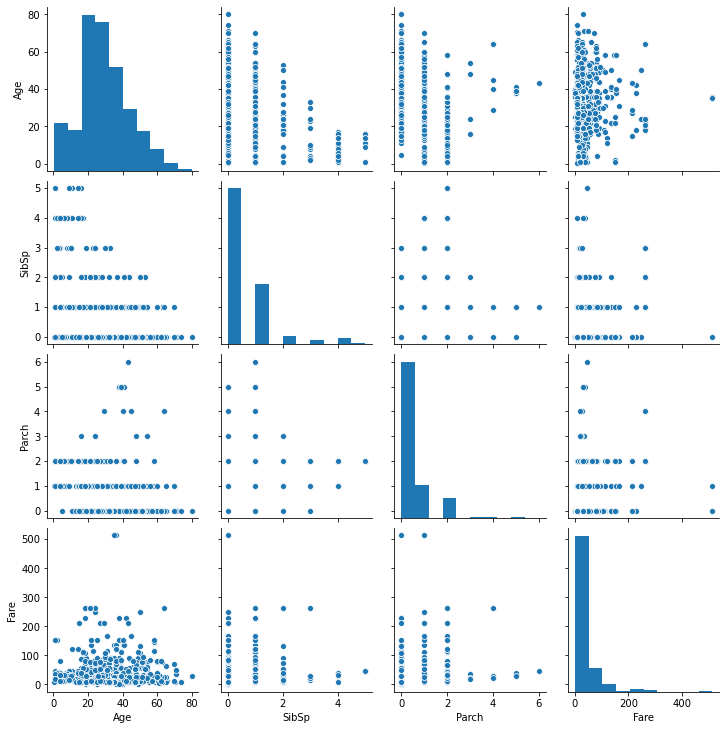

In [4]:
# 使用pairplot繪製資料的多變量圖

# 只選取連續類型的變項
plot_df = df[['Age', 'SibSp', 'Parch', 'Fare']].dropna()
sns.pairplot(data=plot_df)

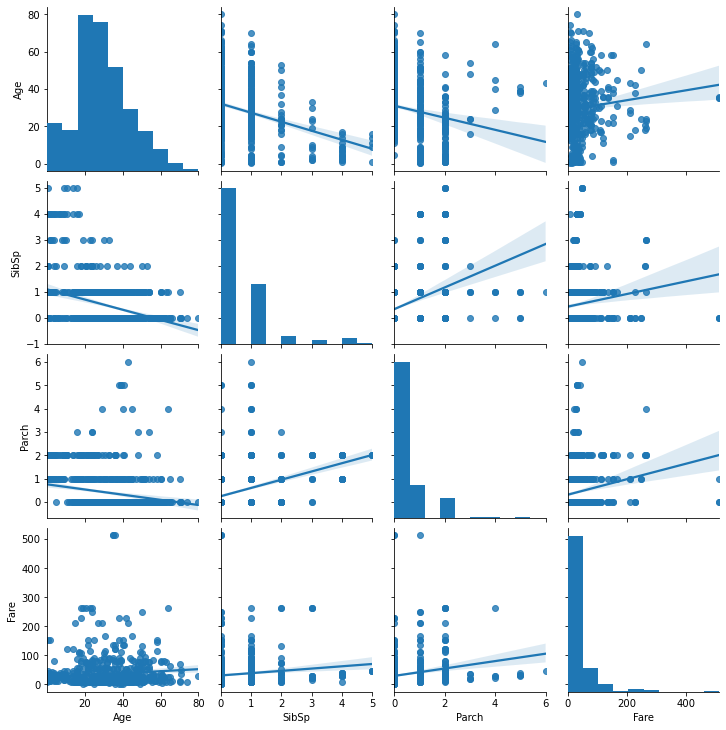

In [5]:
# 我們也可以使用kind參數改變非對角線的圖形類型
plot_df = df[['Age', 'SibSp', 'Parch', 'Fare']].dropna()
sns.pairplot(data=plot_df, kind='reg')

- ### 熱力圖
熱力圖則可以同時考慮兩個類別變項，並且呈現各個分組下的某個特定數值，例如我們可以使用熱力圖觀察各個艙等(Pclass)和性別(Sex)的乘客平均存活率
    - [官方網頁與範例](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

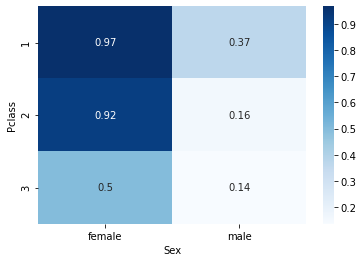

In [6]:
# 事先將資料整理為需要的樣態，在這邊我們利用了Pandas課程時教到的pivot_table
plot_data = df.pivot_table(values='Survived', index='Pclass', columns='Sex')

# 使用heatmap繪製不同艙等與性別的平均存活率，並且修改顏色與加上數值標誌
sns.heatmap(plot_data, cmap="Blues", annot=True)

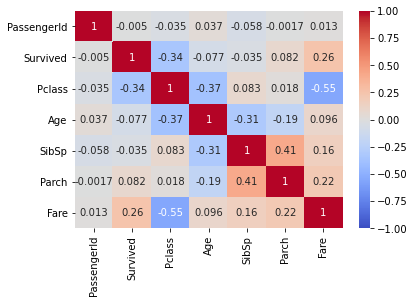

In [7]:
# 我們也可以利用熱力圖觀察變項之間的相關係數
plot_data = df.corr()

# 繪製資料的相關係數矩陣熱力圖
sns.heatmap(plot_data, cmap='coolwarm', annot=True, vmin=-1.0, vmax=1.0)